In [18]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data_path = "/home/aspiringminds/freebird/ML-Practice/data/USA_Housing.csv"

In [3]:
df = pd.read_csv(data_path)

In [4]:
df.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
y = df['Price']

In [7]:
y = np.array(y)
type(y)
y.shape

(5000,)

In [8]:
df.columns = ['income', 'age', 'rooms', 'bedrooms', 'population', 'price', 'address']

In [9]:
X = df[['income', 'age', 'rooms', 'bedrooms', 'population']]

In [10]:
X = np.array(X)
X.shape

(5000, 5)

In [11]:
print(X.shape)
print(y.shape)

(5000, 5)
(5000,)


In [17]:
X[0] # scaling of X is necessary

array([7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
       2.30868005e+04])

In [20]:
scaler_1 = StandardScaler()
normal_X_1 = scaler_1.fit_transform(X)
scaler_2 = MinMaxScaler()
normal_X_2 = scaler_2.fit_transform(X)

In [25]:
df1 = pd.DataFrame(normal_X_1)
print(df1.describe())
df2 = pd.DataFrame(normal_X_2)
print(df2.describe())
print(df.describe())

                  0             1             2             3             4
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03
mean  -2.259304e-17 -8.176446e-18 -4.058254e-16 -2.029016e-16 -3.464784e-16
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00
min   -4.765584e+00 -3.361975e+00 -3.730214e+00 -1.605598e+00 -3.626413e+00
25%   -6.664724e-01 -6.606490e-01 -6.846171e-01 -6.817833e-01 -6.810902e-01
50%    2.075434e-02 -6.852312e-03  1.502401e-02  5.564767e-02  3.616311e-03
75%    6.756386e-01  6.794590e-01  6.742146e-01  4.122077e-01  6.748621e-01
max    3.670725e+00  3.572745e+00  3.750297e+00  2.041039e+00  3.371219e+00
                 0            1            2            3            4
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000
mean      0.564890     0.484803     0.498658     0.440296     0.518234
std       0.118547     0.144216     0.133694     0.274253     0.142920
min       0.000000     0.000000 

In [26]:
n = 5  # No. of features
m = 5000  # No. of training examples

In [27]:
w = np.zeros(shape = (5))  # weight matrix, shape = (n,1) or (n,)

In [28]:
print(type(w))
print(w.shape)
print(w)

<class 'numpy.ndarray'>
(5,)
[0. 0. 0. 0. 0.]


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(normal_X_1, y, test_size = 0.2, random_state = 42)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('Y_train:', Y_train.shape)
print('Y_test:', Y_test.shape)

X_train: (4000, 5)
X_test: (1000, 5)
Y_train: (4000,)
Y_test: (1000,)


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
linear_obj = LinearRegression()

In [38]:
linear_obj.fit(X_train, Y_train)
linear_obj.coef_

array([230745.9407329 , 163243.2731459 , 120309.77397939,   3011.45976047,
       151552.63069253])

In [45]:
Y_predict = linear_obj.predict(X_test)

In [46]:
np.corrcoef(Y_test, Y_predict)

array([[1.        , 0.95812597],
       [0.95812597, 1.        ]])

In [48]:
X_train_transpose = np.transpose(X_train)
X_train_transpose.shape

(5, 4000)

In [80]:
def find_cost(X, y, w):
    y_predict = np.matmul(X,w)
    samples = len(y)
    sum = 0.0
    for i in range(samples):
        sum += (float(y_predict[i] - y[i])**2)/(2*samples)
    return sum

In [97]:
epochs = 1000
learning_rate = 0.01
w = np.zeros(shape = (5))  # weight matrix, shape = (n,1) or (n,)
cost = []

In [98]:
print('w:',w.shape)
print('X_train:',X_train.shape)
print('X_train_transp:',X_train_transpose.shape)
print('y:',Y_train.shape)

w: (5,)
X_train: (4000, 5)
X_train_transp: (5, 4000)
y: (4000,)


In [99]:
samples = len(X_train)
print(samples)
for i in range(epochs):
    tmp = np.matmul(X_train, w) - Y_train
    tmp = np.matmul(X_train_transpose, tmp)
    w = w - (learning_rate*tmp)/samples
    tmp_cost =  find_cost(X_train, Y_train, w)
    cost.append(tmp_cost)
    print(tmp_cost)

4000
817354501993.7268
816279553764.6196
815226787118.0151
814195731728.2067
813185927556.5297
812196924618.3016
811228282755.2673
810279571413.3529
809350369425.6855
808440264800.6832
807548854515.1094
806675744311.978
805820548503.2134
804982889776.8701
804162399008.9089
803358715079.329
802571484692.6129
801800362202.3411
801045009439.8624
800305095547.0006
799580296812.6128
798870296512.9309
798174784755.6321
797493458327.509
796826020545.6384
796172181112.0544
795531655971.7086
794904167173.7351
794289442735.9352
793687216512.3497
793097228063.8997
792519222531.9822
791952950514.9893
791398167947.6517
790854635983.1422
790322120877.8811
789800393878.9938
789289231114.3185
788788413484.943
788297726560.1779
787816960474.9407
787345909829.467
786884373591.3094
786432154999.554
785989061471.2314
785554904509.8351
785129499615.9257
784712666199.7301
784304227495.7839
783904010479.4348
783511845785.2645
783127567627.3611
782751013721.3601
782382025208.2812
782020446580.0352
78166612560

763950678892.7863
763950535543.2333
763950394171.3026
763950254747.0692
763950117241.0898
763949981624.4261
763949847868.5995
763949715945.6062
763949585827.8944
763949457488.3726
763949330900.3878
763949206037.7179
763949082874.5758
763948961385.5903
763948841545.8065
763948723330.6704
763948606716.0336
763948491678.1324
763948378193.589
763948266239.4075
763948155792.9623
763948046831.9941
763947939334.5973
763947833279.227
763947728644.6797
763947625410.087
763947523554.9314
763947423059.0104
763947323902.4426
763947226065.6831
763947129529.4739
763947034274.8877
763946940283.2808
763946847536.3088
763946756015.936
763946665704.3918
763946576584.1923
763946488638.1366
763946401849.2927
763946316200.9939
763946231676.839
763946148260.6833
763946065936.6332
763945984689.0519
763945904502.5431
763945825361.948
763945747252.3586
763945670159.0806
763945594067.6694
763945518963.883
763945444833.7238
763945371663.3959
763945299439.3258
763945228148.1437
763945157776.692
763945088312.0149


763939415595.4191
763939415073.749
763939414557.6464
763939414047.045
763939413541.8918
763939413042.1261
763939412547.6858
763939412058.5236
763939411574.573
763939411095.7842
763939410622.1006
763939410153.4669
763939409689.8274
763939409231.1348
763939408777.3295
763939408328.3627
763939407884.1798
763939407444.7345


In [100]:
import matplotlib.pyplot as plt

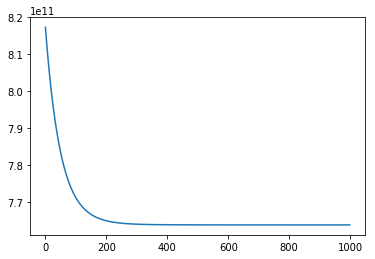

In [101]:
plt.plot(list(range(epochs)), cost)
plt.show()

In [104]:
y_final = np.matmul(X_test, w)


In [105]:
np.corrcoef(y_final, Y_test)

array([[1.       , 0.9569834],
       [0.9569834, 1.       ]])